In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set default seaborn style
sns.set(style="darkgrid")

In [11]:
# Load the OWID COVID-19 dataset
df = pd.read_csv("owid-covid-data (1).csv")

# Preview dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [48]:
# Check shape and columns
print("Shape:", df.shape)
print("\nColumns:", df.columns)

# Check data types and nulls
df.info()
df.isnull().sum().sort_values(ascending=False)

Shape: (3348, 68)

Columns: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vacci

weekly_icu_admissions_per_million     3348
weekly_icu_admissions                 3348
weekly_hosp_admissions_per_million    1872
weekly_hosp_admissions                1872
icu_patients                          1866
                                      ... 
total_cases_per_million                  0
new_cases_per_million                    0
total_deaths_per_million                 0
new_deaths_per_million                   0
iso_code                                 0
Length: 68, dtype: int64

In [49]:
# Select countries
countries = ['Kenya', 'India', 'United States']

# Filter only selected countries
df = df[df['location'].isin(countries)]

# Reset index
df = df.reset_index(drop=True)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [50]:
# Drop rows with no total_cases
df = df.dropna(subset=['total_cases'])

# Fill other missing values forward
df = df.fillna(method='ffill')

# Check cleaned data
df.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_absolute       1674
excess_mortality_cumulative                1674
excess_mortality                           1674
excess_mortality_cumulative_per_million    1674
death_rate                                   28
Length: 68, dtype: int64

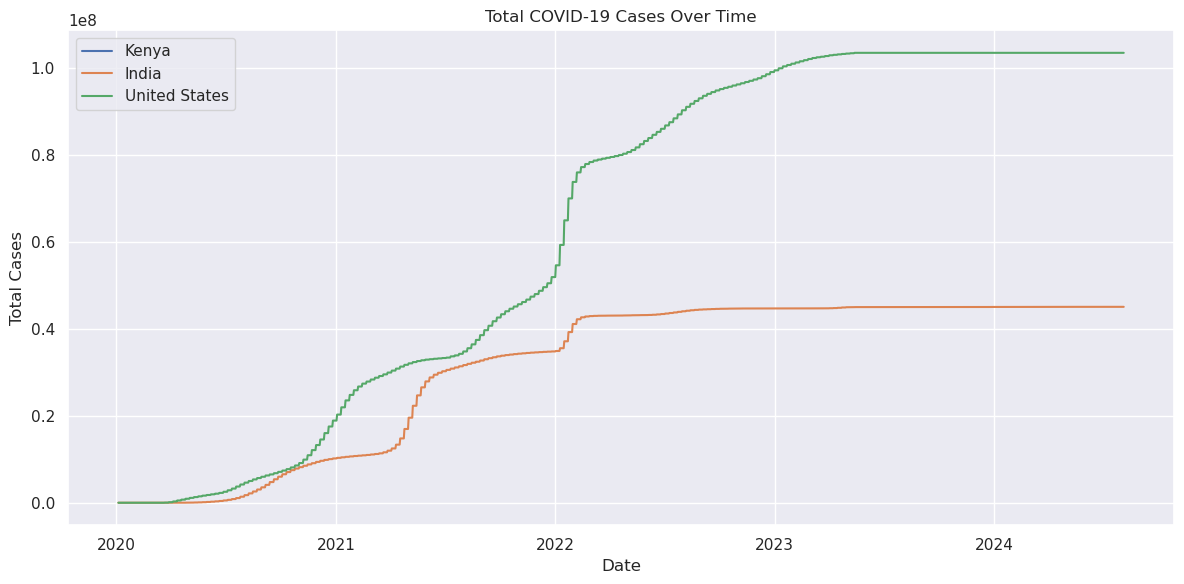

In [51]:
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


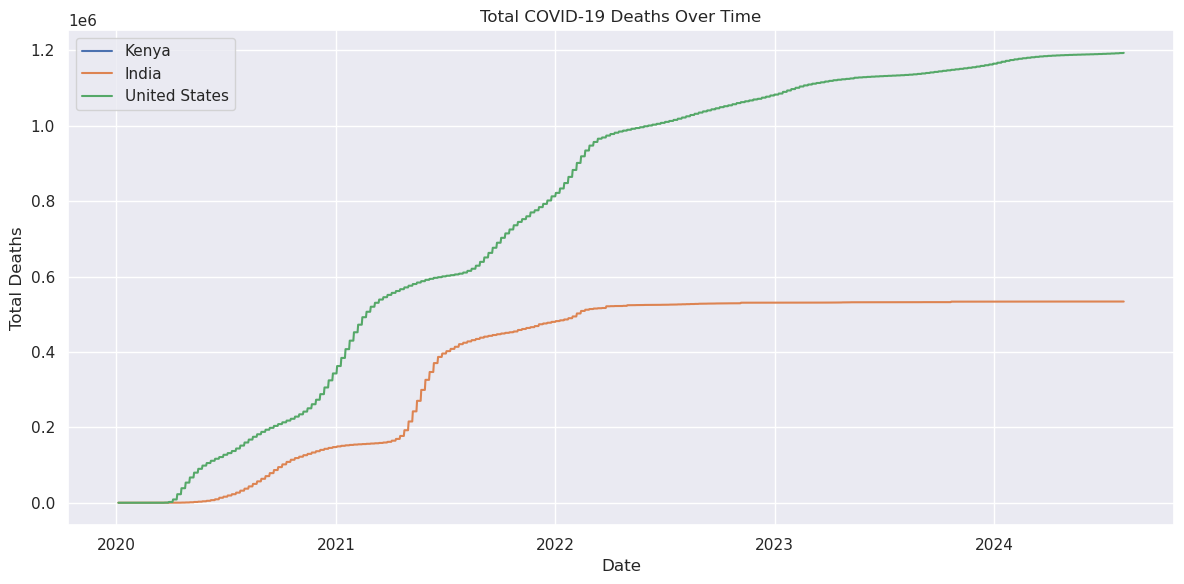

In [52]:
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

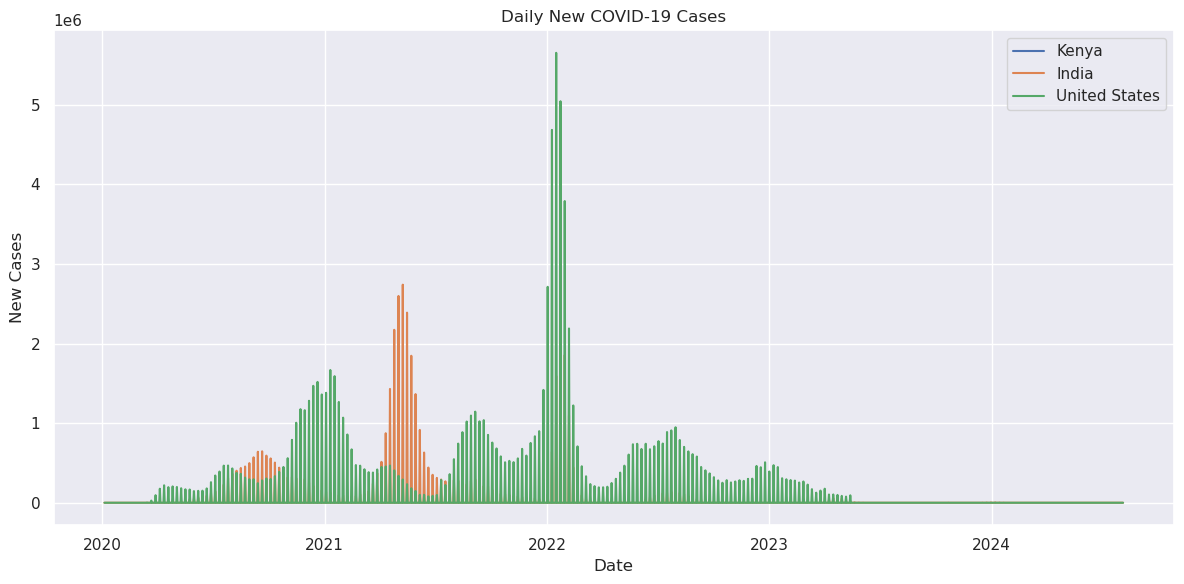

In [53]:
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

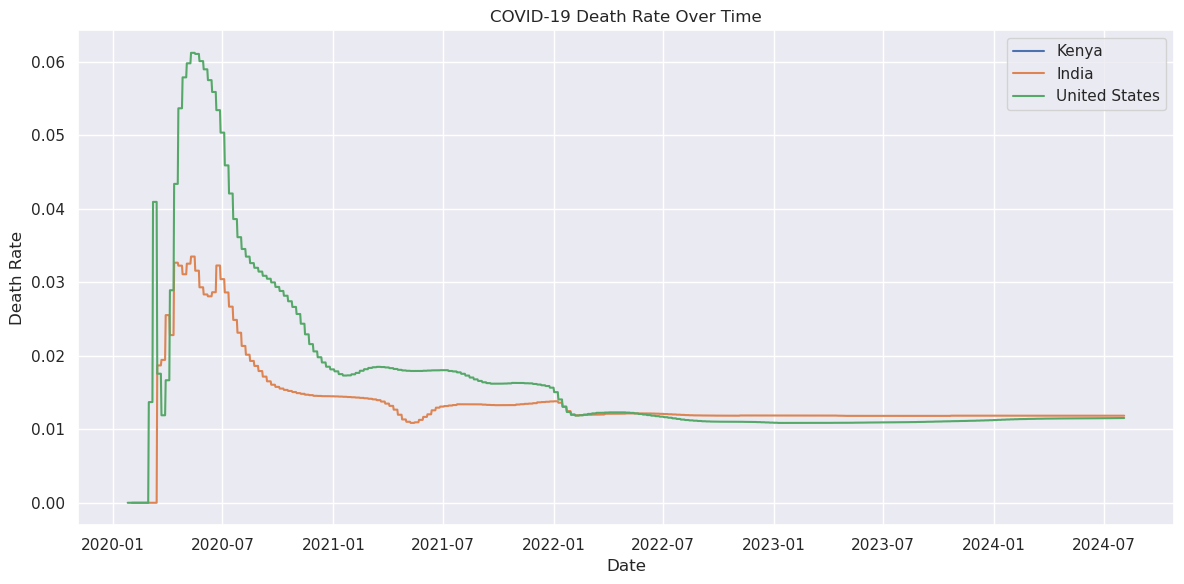

In [54]:
# Create a death rate column
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
plt.show()

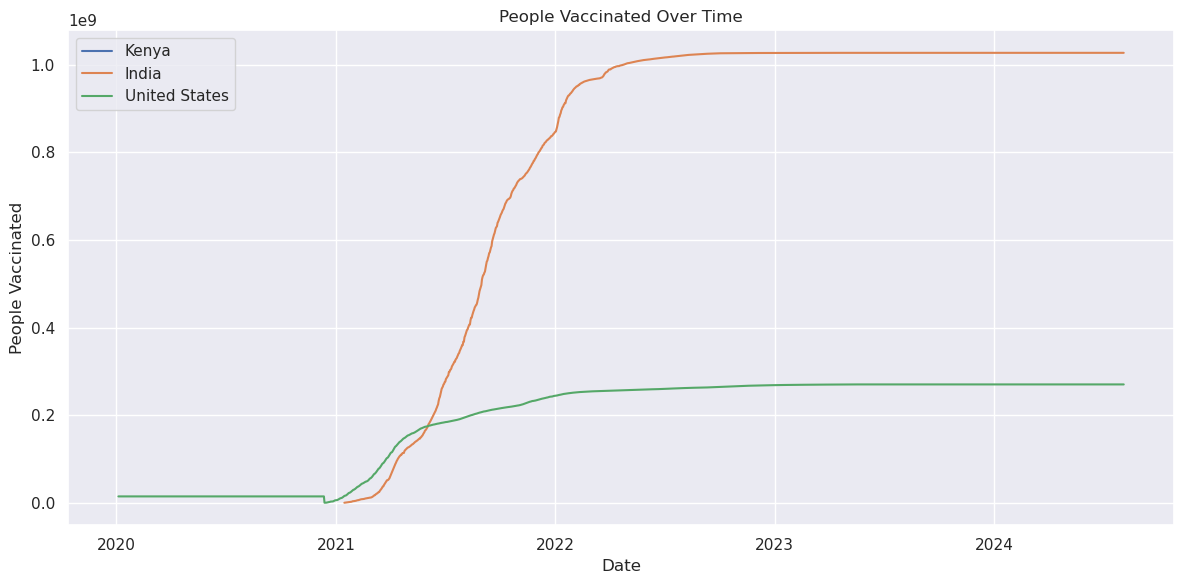

In [55]:
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['people_vaccinated'], label=country)

plt.title("People Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.tight_layout()
plt.show()

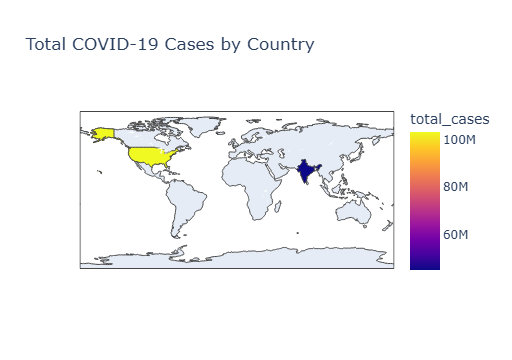

In [56]:
# Get latest data for each country
latest_df = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest_df,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title="Total COVID-19 Cases by Country")
fig.show()

In [57]:
# Summary statistics for key metrics
summary = df.groupby("location")[["total_cases", "total_deaths", "people_vaccinated"]].max().sort_values(by="total_cases", ascending=False)
print("🔹 Max totals by country:\n")
print(summary)

# Country with highest death rate
latest_data = df[df["date"] == df["date"].max()]
latest_data["death_rate"] = latest_data["total_deaths"] / latest_data["total_cases"]
highest_death_rate = latest_data[["location", "death_rate"]].sort_values(by="death_rate", ascending=False).head(5)
print("\n🔹 Countries with highest death rate:\n")
print(highest_death_rate)

# Correlation between vaccinations and new cases (for a country)
country_to_analyze = "India"  # Change to Kenya or USA as needed
country_df = df[df["location"] == country_to_analyze][["date", "people_vaccinated", "new_cases"]].dropna()

🔹 Max totals by country:

               total_cases  total_deaths  people_vaccinated
location                                                   
United States  103436829.0     1193165.0       2.702272e+08
India           45041748.0      533623.0       1.027439e+09

🔹 Countries with highest death rate:

           location  death_rate
1673          India    0.011847
3347  United States    0.011535


/tmp/ipykernel_351/1159202029.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

